<a href="https://colab.research.google.com/github/jcandane/mcrad/blob/main/MCradiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jcandane/pykry

import numpy as np
import matplotlib.pyplot as plt
from pykry.fcc import FCClattice

#np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

def Gaussian1D(T, Γz, t0=0, tt=0, N=1.):
    return N*np.sqrt(4*np.log(2)/np.pi)/Γz * np.exp( - 4*np.log(2) * (T - t0 - tt )**2 / Γz**2 ) ## z00


fatal: destination path 'pykry' already exists and is not an empty directory.


In [33]:
#a = 5.26 Å
Z, R_ix, m_i = FCClattice(5.26, 18, 10, 10, 10, CoM=np.array([0.,0.,0.]))
σ   = 0.01  ## Å^2
σ_i = σ*np.ones(len(R_ix)) ### !!

In [3]:
np.amax(R_ix,axis=0), np.amin(R_ix,axis=0)

(array([24.985, 24.985, 24.985]), array([-24.985, -24.985, -24.985]))

### neighborlist in z ,fixed!!

In [4]:
δx = 0.2 # Å

ten_boxes  = ( R_ix[:,2]/δx ).astype(np.int64)
ten_boxes -= np.amin(ten_boxes)

np.amin(ten_boxes), np.amax(ten_boxes)

ind     = np.argsort(ten_boxes) ## find indices beloning to a box
diff    = np.diff( ten_boxes[ind] )
raw_sor = np.where( diff >= 1 )[0] ### find where boxes end, i.e. box[ind] = np.sort( box )

yo = np.array([], dtype=np.int64)
for i in range(len(raw_sor)):
    yo = np.append(yo, raw_sor[i]*np.ones(diff[raw_sor][i], dtype=np.int64))

sort = np.append([0], np.append(yo, ten_boxes[-1] )) ## !!

sort.shape

(250,)

In [5]:
I = 26
atoms_in_box_I = ind[ sort[I]:sort[I+1] ]
atoms_in_box_I

array([3323, 1484, 1565, 1564, 1044, 1045,  245, 3604, 3605,  685,  684,
       1525, 2365,  244,  324,  325,  564,  565, 1524, 3245, 3244, 2324,
       2325, 3044, 3045, 2804, 2844, 1725, 1724,  964, 2285,  965, 1685,
       1204, 3564, 3324, 2764,  524, 2805,  525, 2765, 3565, 3844, 3845,
       1004, 1645, 1644, 1005, 3325, 1605, 1604, 1684, 2845, 3964, 1485,
       3005, 3004, 1124, 1325, 1324, 1125, 3364, 1285, 1284, 3365, 1164,
       3645, 2964, 1165, 1245, 1244,  204, 3205, 3684, 3685,  205, 3204,
        644,  645, 2965, 2364, 2925, 1365, 3765, 3965,  365,   45, 3924,
       3925, 1445, 1444,  364, 2485,   44, 1364, 2484, 1084, 1405, 1404,
       2884, 2885, 1085, 2924,  604,  605, 3644, 3724, 3725, 2725, 3764,
       2724,    5, 3805, 2045, 2044, 2605,   84, 3125, 2245,  844,  845,
       3885,   85,  444, 2005, 2644, 2645, 3804, 3124, 2444, 2445, 1965,
       1964,  285,  284,  445, 3884, 2604, 2084, 2205, 2204, 2524, 2525,
       2405, 2404,  404,  405,  764, 3444,  765, 22

total # = 984.735


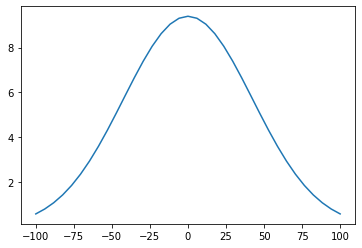

True
6141


In [42]:
A    = 50*50 ## Å^2
zed  = np.linspace(-100,100,35)
f    = 1000*Gaussian1D(zed, 100, t0=0, tt=0) #, N=1.)
print("total # = %4.3f" % (np.sum((zed[1] - zed[0])*f) ) )

def beam_sample_interaction(i, j): 
    """
    GIVEN:  i : beam index
            j : sample index
            A    : Beam Area
            f    : fluence function
            ind  : indices
            sort : sorted
    GET:    atomic hits/collisions
    """
    atoms_in_box_j = ind[ sort[j]:sort[j+1] ]
    P    = 1 - (1 - σ_i[atoms_in_box_j] / A ) ** (f[i] * A) ## !!!
    hits = np.where( np.random.rand(len(P)) < P )[0]
    return atoms_in_box_j[hits]

plt.plot(zed, f)
plt.show()

HITs = 0
counter = 0
sims = np.asarray( np.meshgrid( np.arange(0,len(zed)), np.arange(0,len(sort)-1) ) ) ## ordered-pair, beam, box
### create an array, take diagonals, as the interactions for each time instance
for i in range( 2 - len(sort) , len(zed) ):
    I = np.diag( sims[0] , k=i) ## beam index
    J = np.diag( sims[1] , k=i) ## sample index

    if len(I) == 0 or len(I) == 0:
        print("no good")
    counter += I.size

    for k in range(len(I)):
        HITs += len( beam_sample_interaction(I[k], J[k]) )

np.arange(0,len(sort)-1)

sims = np.asarray( np.meshgrid( np.arange(0,len(zed)), np.arange(0,len(sort)-1) ) ) ## ordered-pair, beam, box
##sims[:,34,35]
##np.diag( sims[0] , k=131)
##np.diag( sims[0] , k=K), np.diag( sims[1] , k=K)
print(counter == sims[0].size)
print(HITs)

In [7]:
beam_sample_interaction(17, 26)

array([ 564, 3964, 2964, 3204,   45, 3924, 1444, 1084, 2724, 2605, 2604,
       2404,  885,  924])

In [8]:
AA = np.diag( sims[0] , k=-180)
len(AA) == 0 #is np.array([], dtype=np.int64)

print(len(sort))
print(len(zed))

sims = np.asarray( np.meshgrid( np.flip( np.arange(0,len(zed)) ), np.arange(0,len(sort)-1) ) ) 
print( np.diag( sims[0] , k=14) ) ## k in [-130, 14]
print( np.diag( sims[0] , k=-130) )

range( 2 - len(sort) , len(zed)-1 )

250
35
[20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
[34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11
 10  9  8  7  6  5  4  3  2  1  0]


range(-248, 34)

## Spatially Homogenous

### + static

In [27]:
A = 50*50 ## å^2
f = 10 ## e/å^2

N = f*A
print("Number of Beam Particles: %4i" % N)

P    = 1 - ( 1 - σ_i/A)**(f*A)
hits = np.where( np.random.rand(len(R_ix)) < P )[0]
print(hits)
print(len(hits))

Number of Beam Particles: 25000
[   1    9   17   22   36   57   60   64   82   89  121  124  130  150
  161  193  200  203  226  228  234  270  287  292  320  325  342  343
  364  367  377  412  446  449  476  490  493  513  553  559  599  631
  650  654  664  665  671  672  683  695  696  716  739  760  791  793
  801  811  817  829  833  837  864  882  883  923  933  942  951  978
 1034 1047 1071 1074 1085 1105 1110 1112 1114 1122 1128 1135 1139 1165
 1192 1195 1208 1218 1240 1263 1280 1292 1298 1308 1337 1354 1364 1368
 1377 1378 1407 1415 1416 1422 1464 1469 1478 1479 1497 1506 1509 1539
 1548 1559 1572 1575 1585 1606 1610 1623 1625 1626 1636 1649 1657 1673
 1687 1693 1729 1735 1750 1764 1768 1777 1796 1801 1826 1828 1838 1851
 1855 1859 1884 1885 1887 1889 1897 1900 1902 1912 1913 1930 1931 1971
 1976 1993 2006 2015 2037 2043 2054 2060 2073 2074 2099 2110 2118 2142
 2145 2148 2149 2160 2162 2167 2178 2179 2200 2235 2240 2251 2263 2264
 2269 2277 2278 2325 2351 2357 2364 2381 2383

### +dynamic

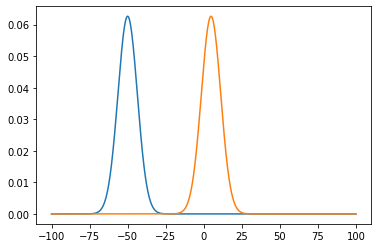

0.9999999999994864
94368.0


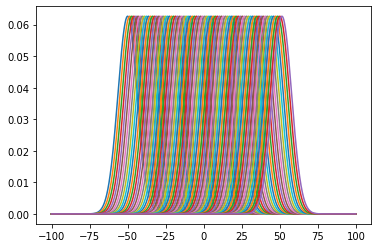

In [10]:
### beam parameters
A = 50*50 ## å
f = 10 ## e/å^2

vel  = 137
dt   = 0.01
time = np.arange(0,0.75,dt)
Γz   = 3.0   ## å
t0   = 5.0

zed  = np.arange(-100,100,0.01)
Γz   = 15
plt.plot(zed, Gaussian1D(zed, Γz, t0=-50, tt=0))
plt.plot(zed, Gaussian1D(zed, Γz, t0=-50, tt=vel*dt*40))
plt.show()

print( np.sum(Gaussian1D(zed, Γz, t0=-50, tt=0) * 0.01) )

num_hits = 0.
for t in range(len(time)):
    f    = Gaussian1D(R_ix[:,2], Γz, t0=-50, tt=vel*dt*t, N=25000)
    P    = 1 - ( 1 - σ_i/A)**(f*A)

    plt.plot(zed, Gaussian1D(zed, Γz, t0=-50, tt=vel*dt*t))
    hits = np.where( np.random.rand(len(R_ix)) < P )[0]
    num_hits += len(hits)

print(num_hits)

## Spatially Inhomogenous

### pulse profile

$ N(x,y,z) = \exp{\left( - \xi_1 (x-x_0)^2 - \xi_2 (y - y_0)^2 - \xi_3 (z - z_0)^2 \right)} $

$N(x,y,z,t) = \exp{\left( - \xi_1 (x-x_0)^2 - \xi_2 (y - y_0)^2 - \xi_3 (z - z_0 - v t)^2 \right)} $ (Flux given the position)

$N(t)$ (Total Flow)

$P = \frac{\text{scattered flow}}{\text{flow in}}$

$\sigma = \frac{\text{scattered flow}}{\text{flux in}} \quad\Rightarrow\quad \text{flux in} \sigma = \text{scattered flow}$

$\therefore\quad P = \frac{\text{flux in} \sigma}{\text{flow in}} = \frac{\sigma N(\hat{x},\hat{y},t)}{N(t)}$

0.9999975183479981


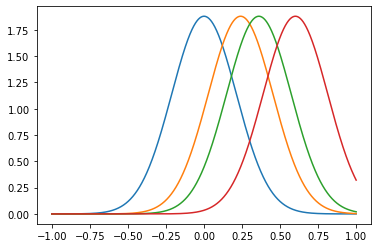

(0.0, 0.006480265999183521)

In [11]:
Γx  = 2     ## å (a0)
Γy  = 10    ## å
Γz  = 0.5   ## å
x0  = -50   ## å
y0  =  50   ## å
z00 = -180  ## å
σ   = 0.01  ## å

σ_i = σ*np.ones(len(R_ix)) ### !!

dt = 0.001
T  = np.arange(-1,1,dt)
N  = np.sqrt(4*np.log(2)/np.pi)/Γz * np.exp( - 4*np.log(2) * (T - 0)**2 / Γz**2 ) ## z00

vv = 120.
M  = np.sqrt(4*np.log(2)/np.pi)/Γz * np.exp( - 4*np.log(2) * (T - 0 - vv*2*dt )**2 / Γz**2 ) ## z00

def Gaussian1D(T, Γz, t0=0, tt=0):
    return np.sqrt(4*np.log(2)/np.pi)/Γz * np.exp( - 4*np.log(2) * (T - t0 - tt )**2 / Γz**2 ) ## z00

print( np.sum( N * dt ) )

plt.plot(T, N)
plt.plot(T, M)
plt.plot(T, Gaussian1D(T, Γz, t0=0, tt=vv*3*dt))
plt.plot(T, Gaussian1D(T, Γz, t0=0, tt=vv*5*dt))
#plt.xlim([-210,-100])
plt.show()

len(T)

np.amin(Gaussian1D(R_ix[:,2], Γz, t0=0, tt=vv*5*dt) ), np.amax(Gaussian1D(R_ix[:,2], Γz, t0=0, tt=vv*5*dt) )

$P = \frac{\text{scattering flow}}{\text{flow in}} = \frac{\left( \text{ flux-in } \right)\,\sigma}{\text{flow in}} = \frac{N(\hat{x},\hat{y},\hat{z}|\hat{t})\,\sigma}{N(\hat{t})}$ 

$P = \frac{N(R_{ix}|\hat{t})\,\sigma_i}{N(\hat{\hat{z}-v\hat{t}})}$ 

In [12]:
def get_flux(R_ix, Γx, Γy, Γz, x0=0, y0=0, z0=0):
    N_flux = 8/(Γx*Γy*Γz) * (np.log(2)/np.pi)**(3/2) * np.exp( - 4*np.log(2) * (  (R_ix[:,0] - x0)**2 + (R_ix[:,1] - y0)**2 + (R_ix[:,2] - z0)**2) )
    return N_flux

def get_flow(R_ix, Γz, z0=0):
    return 2/Γz * np.sqrt(np.log(2)/np.pi) * np.exp( - 4*np.log(2) * (R_ix[:,2] - z0)**2 / Γz**2 )

def flux_over_flow(R_ix, Γx, Γy, Γz, x0=0, y0=0, z0=0):
    return 8/(Γx*Γy*Γz) * (np.log(2)/np.pi)**(3/2) * np.exp( - 4*np.log(2) * (  (R_ix[:,0] - x0)**2 + (R_ix[:,1] - y0)**2 + (R_ix[:,2] - z0)**2) ) / (2/Γz * np.sqrt(np.log(2)/np.pi) * np.exp( - 4*np.log(2) * (R_ix[:,2] - z0)**2 / Γz**2 ))

dt = 0.001
T  = np.arange(-1,1,dt)
N = get_flow(R_ix, 0.5, z0=0)

In [13]:
flux_over_flow(R_ix, Γx, Γy, Γz, x0=0, y0=0, z0=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([nan, nan, nan, ..., nan, nan, nan])

In [14]:
N      = 1
N_flux = N * 8/(Γx*Γy*Γz) * (np.log(2)/np.pi)**(3/2) * np.exp( - 4*np.log(2) * (  (R_ix[:,0] - 0)**2 + (R_ix[:,1] - 0)**2 + (R_ix[:,2] - 0)**2) )
N_t    = N/N * Gaussian1D(R_ix[:,2], Γz, t0=0, tt=vv*5*dt)

#N_t[ np.where(N_t==0)[0] ] = np.nan

print( np.amin( N_t )   , np.amax( N_t ) )
print( np.amin( N_flux ), np.amax( N_flux ) )

P = (σ_i * N_flux) / N_t

print( np.amin( P ), np.amax( P ) )

P[np.where(P < 1e-10)[0] ] = 0
P[np.where(P > 1.)[0] ] = 0
P[np.where(P > 0.)[0] ]

0.0 0.006480265999183521
0.0 4.699160065826034e-08
nan nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


array([5.94177382e-05, 5.94177382e-05, 2.53327916e-09, 2.53327916e-09,
       7.25149256e-08, 2.07573429e-06, 2.07573429e-06, 2.53327916e-09,
       2.53327916e-09, 7.25149256e-08, 5.94177382e-05, 5.94177382e-05])

In [15]:
N  = 10000.
PP = 1 - (1 - P)**N
PP[np.where(PP > 0.)[0] ]

array([4.47993267e-01, 4.47993267e-01, 2.53324706e-05, 2.53324706e-05,
       7.24886425e-04, 2.05434133e-02, 2.05434133e-02, 2.53324706e-05,
       2.53324706e-05, 7.24886425e-04, 4.47993267e-01, 4.47993267e-01])

In [16]:
t = -1.0  ## system time in a.u.
v = 120. ## speed in a.u.

print( v * t * dt )

z0 = z00 - v*t ## total time ## v_beam * time

N_flux = 8/(Γx*Γy*Γz) * (np.log(2)/np.pi)**(3/2) * np.exp( - 4*np.log(2) * (  (R_ix[:,0] - x0)**2 + (R_ix[:,1] - y0)**2 + (R_ix[:,2] - z0)**2) )
N_t    = (2/Γz) * np.sqrt(np.log(2)/np.pi) * np.exp( - 4*np.log(2) *(R_ix[:,2] - z0)**2 / Γz**2 ) + 1e-15
#
print(N_t.shape)
print(N_flux.shape)
print(σ_i.shape)
#σ_system * N / N_t

P = (σ_i * N_flux)/ N_t

print( np.allclose( (P), np.zeros(len(R_ix)) ) )

print(z0)

P

def get_probs(σ_i, v, t, R_ix, Γx, Γy, Γz, x0, y0, z00, N):
    """
    GIVEN:  pulse parameters (v, Γx, Γy, Γz, x0, y0, z00, N)
            system cross sections (σsystem in a.u.)
            system positions (R_ix, in a.u.)
            global time (t, in a.u.)
    GET:    collision probabilities for all atoms (P)
    """

    z0     = z00 - v*t
    N_flux = N * 8/(Γx*Γy*Γz) * (np.log(2)/np.pi)**(3/2) * np.exp( - 4*np.log(2) * (  (R_ix[:,0] - x0)**2 + (R_ix[:,1] - y0)**2 + (R_ix[:,2] - z0)**2) )
    N_t    = N * (2/Γz) * np.sqrt(np.log(2)/np.pi) * np.exp( - 4*np.log(2) *(R_ix[:,2] - z0)**2 / Γz**2 ) + 1e-15
    P      = (σ_i * N_flux)/ N_t

    return P

np.allclose(get_probs(σ_i, v, t, R_ix, Γx, Γy, Γz, x0, y0, z00, 10), P)

-0.12
(4000,)
(4000,)
(4000,)
True
-60.0


True

### backup

In [17]:
t = 1400
v = 0.1

print( v * t * dt )

z0 = z00 + v*t

N_flux = 8/(Γx*Γy*Γz) * (np.log(2)/np.pi)**(3/2) * np.exp( - 4*np.log(2) * (  (R_ix[:,0] - x0)**2 + (R_ix[:,1] - y0)**2 + (R_ix[:,2] - z0)**2) )
N_t    = (2/Γz) * np.sqrt(np.log(2)/np.pi) * np.exp( - 4*np.log(2) *(R_ix[:,2] - z0)**2 / Γz**2 ) + 1e-15
#
print(N_t.shape)
print(N_flux.shape)
print(σ_i.shape)
#σ_system * N / N_t

P = (σ_i * N_flux)/ N_t

print( np.allclose( (P), np.zeros(len(R_ix)) ) )

print(z0)

P

0.14
(4000,)
(4000,)
(4000,)
True
-40.0


array([0., 0., 0., ..., 0., 0., 0.])

## MC part

In [18]:
np.random.rand(len(R_ix)) < P

array([False, False, False, ..., False, False, False])

## For-loop over time

In [19]:
time = np.arange(-1, 1, 0.001)

for i in range(len(time)):
    a = ( np.where( np.random.rand(len(R_ix)) < get_probs(σ_i, v, time[i], R_ix, Γx, Γy, Γz, x0, y0, z00, 10000000) )[0] )
    if len(a) != 0:
        print(a)

In [20]:
"""
I = 18
##atoms_in_box_I = ind[ sor[I]:sor[I+1] ]

np.amax(ten_boxes) - np.amin(ten_boxes)

#ind[ sor[8]:sor[8] ]

print(ten_boxes.shape)
print(np.diff( ten_boxes[ind] ))
qwe = 1.*sor

print("******")
print(diff[sor])
print(sor)
yo = np.array([], dtype=np.int64)
for i in range(len(sor)):
    yo = np.append(yo, sor[i]*np.ones(diff[sor][i], dtype=np.int64))
print(yo)
aa = np.array([1,2,3,4,5,6,7,9])
#np.insert(aa, (diff[sor])[i], sor[i])
"""

'\nI = 18\n##atoms_in_box_I = ind[ sor[I]:sor[I+1] ]\n\nnp.amax(ten_boxes) - np.amin(ten_boxes)\n\n#ind[ sor[8]:sor[8] ]\n\nprint(ten_boxes.shape)\nprint(np.diff( ten_boxes[ind] ))\nqwe = 1.*sor\n\nprint("******")\nprint(diff[sor])\nprint(sor)\nyo = np.array([], dtype=np.int64)\nfor i in range(len(sor)):\n    yo = np.append(yo, sor[i]*np.ones(diff[sor][i], dtype=np.int64))\nprint(yo)\naa = np.array([1,2,3,4,5,6,7,9])\n#np.insert(aa, (diff[sor])[i], sor[i])\n'